# COGS 108 - Final Project

# Introduction and background

## Overview
Our team are investigating the effectiveness of 3-point shots in NBA matches. We combine the data from multiple sources and verify the on-going trend of teams making more three-pointers over recent years. By graphical observation and by A/B testing the model, we conclude that a positive change in more three-point shots attempts will lead to more wins, but the positive relationship cannot be fully explained due to the abundance of variables.

## Names and IDs
<pre>
| Name        | PID       |
|-------------|-----------|
| Yuxin Zou   | A13996888 |
| Vinci Reyes | A14155362 |
| Chase Rowe  | A13881018 |
| Eason Chang | A12986131 |
| Alex Liang  | A13875895 |
</pre>

## Research Question
Is there a statistical significant relationship between the `Field Goal Attempted for 3 pointers` versus `win rates` in NBA regular season?

## Background and Prior Work
The 3-point shot wasn’t supposed to be taken seriously. It was introduced as a gimmick that had high visual appeal to spectators in the the 1979-80 NBA season, and in that season, teams averaged about 2.8 3-point attempts per game. Fast forward 38 years, and teams across the NBA are averaging about 29 3-point attempts per game [[1]](https://www.basketball-reference.com/leagues/NBA_stats_per_game.html). In a vacuum, this makes sense—there’s a very large benefit in shooting a 3-pointer: the value of making a 3-pointer is 50% higher than that of making a 2-pointer, even if the shot itself is harder to make. The shift towards 3-pointers has completely revolutionized the game of basketball, with the shift away from close-range shots affecting which roles are critical to teams’ strategies. In fact, the shift has been so dramatic, the NCAA is pushing back the 3-point line for the 2020-21 basketball season [[2]](https://www.espn.com/mens-college-basketball/story/_/id/26905011/ncaa-moving-3-point-line-back-next-season). We were curious as to whether or not there was any substantial evidence that the shift to longer-range shots has any actual effect on a team’s win-rate throughout the NBA regular season. There have been several analysts and announcers that have been dubious about the shift, and some have gone so far as to call it a “trend”, or something that will fade soon [[3]](https://shottracker.com/articles/the-3-point-revolution). We wanted to see if there was any statistical evidence of that happening.

During our initial data scraping, we found a research paper written by a student from UC Berkeley in 2015 [[4]](https://www.stat.berkeley.edu/~aldous/Research/Ugrad/Stanley_Yang%20_Thesis.pdf). It outlines how to predict trends or patterns in a team’s dynamic using regression analysis of publicly available basketball statistics. The student predicts 6 out of 8 teams that have gone to the playoffs during the time frame he is studying using the data he refines. Halfway through our project, we found out that one of the published report on github [[5]](https://github.com/COGS108/FinalProjects-Wi18/blob/master/001-FinalProject.ipynb) has a very similar topic: they investigated the effectiveness of a 3-point driven strategy on team shots data. They observed that the years that a higher number of 3-point shots attempted that have a positive effect on playoff rankding further outnumbered that of a negative effect, thereby concluding that adopting a 3-point strategy is preferrable in making the playoffs. However, their definition of effectiveness is limited to the playoffs and therefore not direcltly linked to teams' performance in the regular season. Also, only observing the majority of effectiveness scores are positive cannot necessarily prove the statistical significance of the outcome. We plan to develop more complex metrics/features and comprehensive analysis of the regression.


References:
1. https://www.basketball-reference.com/leagues/NBA_stats_per_game.html
2. https://www.espn.com/mens-college-basketball/story/_/id/26905011/ncaa-moving-3-point-line-back-next-season
3. https://shottracker.com/articles/the-3-point-revolution
4. https://www.stat.berkeley.edu/~aldous/Research/Ugrad/Stanley_Yang%20_Thesis.pdf
5. https://github.com/COGS108/FinalProjects-Wi18/blob/master/001-FinalProject.ipynb

## Hypothesis
We predict that the increased number of 3-point shots taken is integral to winning a professional basketball game. The league-wise average of 3-point shots has risen dramatically in the past 5 years—there wouldn’t be a reason for that increased shift if the 3-pointer was indeed a “gimmick” and not as effective as the 2-pointer.
It'll be interesting to see whether or not there has been a noticeable increase in 3-point shots taken in the past 4 years, and to be able to mark whether or not the origin of the 3-point revolution can be traced. Our team predicts that, due to the nature of the NBA, there will likely be an increased rate of 3-point efficiency in winning games.

# Datasets

### Team Shots
- Dataset Name: NBA Teams Shooting Stats
- Link to the dataset: https://stats.nba.com/teams/shooting/
- Number of observations: 682
- Description: The dataset includes various shooting statistics and metrics for every team in the regular season from 1997 to 2018.
- Features used:
        For each team name:
        - FGM: Number of Field Goals Made
        - FGA: Number of Field Goals Attempted
        - FG%: Field Goals Percentage
        - Less than 8 feet: Close Range
        - 8-16 feet: Mid Range
        - 16-24 feet: Long Range
        - 24+ feet: Three Pointer
        - Backcourt Shot


### Team Standings
- Dataset Name: NBA Teams Shooting Stats
- Link to the dataset: https://www.basketball-reference.com/leagues/NBA_2019_standings.html and more!
- Number of observations: 682
- Description: The dataset contains the team standings for the games played in the regular season from 1997 to 2018.
- Features used:
        For each team:
        - W: Number of Wins
        - L: Number of Losses
        - W/L%: Win-Loss Percentage
        - GB: Games Behind
        - PS/G: Points Per Game
        - PA/G: Opponent Points Per Game
        - SRS: Simple Rating System; a team rating that takes into account average point differential and strength of schedule.

**Total number of observations: 682 + 682 = 1364 > 1000**

## Setup

In [84]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
import glob
import os
import re
import patsy
import statsmodels.api as sm
import seaborn as sns

## Data Collection (team shots)

First, we collected shooting data from the official NBA website (https://stats.nba.com/teams/shooting/?Season=2018-19&SeasonType=Regular%20Season&DistanceRange=8ft%20Range&PerMode=Totals). 

Definitions:
We were able to copy each team’s shooting data from the season 1996-1997 all the way until the most recent season 2018-2019 into one google sheets document, with each sheet representing a season. Before we could import this data into python using pandas’s data frame, we have to first do some work.

<img src="http://acsweb.ucsd.edu/~yuz530/cogs108_writeup_img/data-shots-image-1.png" width="700">

We immediately notice certain things. The top most row represents each types of different shots. With data frame’s structure in mind, the second row with FGM, FGA, and FG% will be each column’s label. In order to be able to access each column’s data accurately without trouble, we have to do some manipulation to that label to make each column’s label unique. For example, FGM in less than 8 feet with be changed to FGM-C, FGM within 8-16 feet with be changed to FGM-L, etc. In our data, we can also eliminate the three rows for backcourt shots, since they are not a type of shot normally taken in a game situation, these are shots taken way out of range near the end of a quarter (play period). Therefore, it is safe to eliminate these three columns in Backcourt Shot and still preserve the data integrity. 


<img src="http://acsweb.ucsd.edu/~yuz530/cogs108_writeup_img/data-shots-image-2.png" width="700">

Now we are ready to download it into a csv and import it into python through pandas.

## Data Cleaning / Pre-processing

**The first step we need to do is to combine the data from all the years into one giant dataframe.**

In [85]:
# FG is a list that will store each year's shot data in order
FG = glob.glob('Shot Data - CSV/Shot Data - *.csv')

In [86]:
# We want to add the name of the season to the dataframe
YEARs = [re.findall(r'Shot Data - ((\d+)-\d+).csv', s)[0] for s in FG]

# A sample of the `YEAR_SPAN` and `Year` column
YEARs[:5]

[('1996-1997', '1996'),
 ('1997-1998', '1997'),
 ('1998-1999', '1998'),
 ('1999-2000', '1999'),
 ('2000-2001', '2000')]

In [87]:
# Read these csv into dataframes

FG = [pd.read_csv(fp, skiprows=1) for fp in FG]  # Skip first row, redundant information

# Add the `YEAR_SPAN` and `Year` column in a for loop

for i in range(len(YEARs)):
    FG[i]['YEAR_SPAN'] = YEARs[i][0]  # Assign '1998-1999'
    FG[i]['YEAR'] = YEARs[i][1]  # Assign '1998'
    FG[i]['YEAR'] = FG[i]['YEAR'].astype(int) # Convert to integer type

### Joining data

In [88]:
# Join the dataframe (concatenation)

shots_df = pd.concat(FG, ignore_index=True)
shots_df.sample(3)

,TEAM,FGM-C,FGA-C,FG%-C,FGM-M,FGA-M,FG%-M,FGM-L,FGA-L,FG%-L,FGM-T,FGA-T,FG%-T,YEAR_SPAN,YEAR
243,Los Angeles Clippers,1436,2583,55.6,509,1271,40.0,748,1845,40.5,231,651,35.5,2004-2005,2004
394,Los Angeles Lakers,1596,2860,55.8,484,1142,42.4,532,1310,40.6,531,1542,34.4,2009-2010,2009
480,Detroit Pistons,1826,3405,53.6,230,670,34.3,409,1122,36.5,514,1421,36.2,2012-2013,2012


### Replacing team names
**By looking at the number of appearance for each team in the whole dataset, we notice there are teams that have changed their names.**

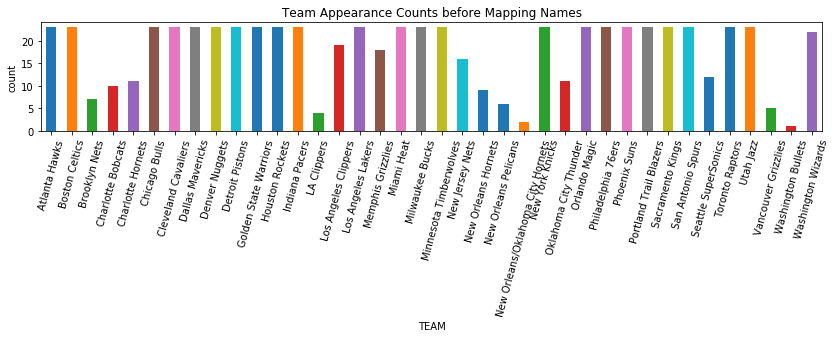

In [89]:
def display_team_counts(df, title):
    fig, ax = plt.subplots(0)
    ax = df.groupby("TEAM")['YEAR'].nunique().sort_index() \
           .plot.bar(figsize=(14, 2))
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=75)
    plt.ylabel('count')
    plt.title(title)
    plt.show()
    
display_team_counts(shots_df, 'Team Appearance Counts before Mapping Names')

In [90]:
# Function definition for replacing team names
# Data source: manual googling.

def replace_team_name(name):
    if name == 'Seattle SuperSonics':
        return 'Oklahoma City Thunder'
    elif name == 'Charlotte Bobcats':
        return 'Charlotte Hornets'
    elif name == 'Vancouver Grizzlies':
        return 'Memphis Grizzlies'
    elif name == 'New Orleans Hornets' or name == 'New Orleans/Oklahoma City Hornets':
        return 'New Orleans Pelicans'
    elif name == 'Washington Bullets':
        return 'Washington Wizards'
    elif name == 'Los Angeles Clippers':
        return 'LA Clippers'
    elif name == 'New Jersey Nets':
        return 'Brooklyn Nets'
    return name

# Replacing
shots_df['TEAM'] = shots_df['TEAM'].apply(replace_team_name)

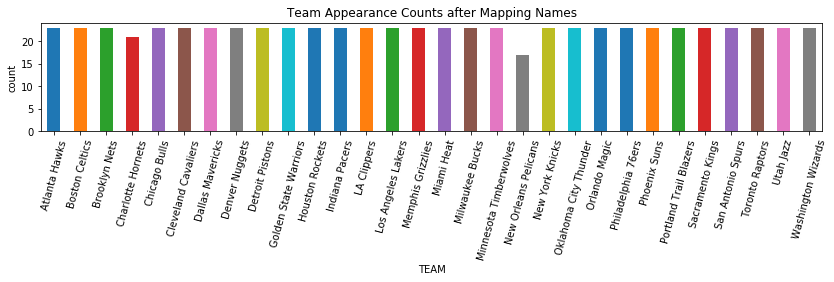

In [91]:
display_team_counts(shots_df, 'Team Appearance Counts after Mapping Names')

**We are able to see that most of the teams have been in the NBA from all the years in the dataset.**

## Data Collection (season ranking)

**We decided to get our seasonal win data from the same source, using html requests**

In [92]:
# For cleaning the team name in the original table
def standardize_team_name(name):
    out = name.split('(')[0]
    out = out.replace('*', '')
    out = out.strip()
    return out

big_df = []

# For cleaning purposes
division = [
    'Atlantic Division', 'Central Division', 'Northwest Division', 'Southeast Division',
    'Southwest Division', 'Pacific Division', 'Midwest Division'
]

In [93]:
for year in range(1997, 2019+1):
    # Scrape data from the source website
    nba_year = 'https://www.basketball-reference.com/leagues/NBA_'+ str(year) + \
        '_standings.html'
    data = pd.read_html(nba_year)

    # Combine the tables we want and standardize
    data[0] = data[0].rename(index=str, columns={"Eastern Conference": "TEAM"})
    data[1] = data[1].rename(index=str, columns={"Western Conference": "TEAM"})
    df_data = pd.concat(data[:2], sort=False, ignore_index=True)
    df_data['TEAM'] = df_data['TEAM'].apply(standardize_team_name)

    # Drop excess rows and columns that contain useless information
    df_data = df_data.drop(columns = ['GB', 'SRS'])
    for div in division:
        df_data = df_data[df_data.TEAM != div]

    
    df_data['YEAR_SPAN'] = str(year - 1) + '-' + str(year)
    df_data['YEAR'] = str(year - 1)
    big_df.append(df_data)

In [94]:
# Now we combine them into one dataframe
win_df = pd.concat(big_df, sort=False, ignore_index=True)
win_df.head()

,TEAM,W,L,W/L%,PS/G,PA/G,YEAR_SPAN,YEAR
0,Miami Heat,61.0,21.0,0.744,94.8,89.3,1996-1997,1996
1,New York Knicks,57.0,25.0,0.695,95.4,92.2,1996-1997,1996
2,Orlando Magic,45.0,37.0,0.549,94.1,94.5,1996-1997,1996
3,Washington Bullets,44.0,38.0,0.537,99.4,97.7,1996-1997,1996
4,New Jersey Nets,26.0,56.0,0.317,97.2,101.8,1996-1997,1996


## Further Data Cleaning / Pre-processing

### Combining two datasets

In [95]:
# Apply the same rules to replace team names
win_df['TEAM'] = win_df['TEAM'].apply(replace_team_name)

# Add a new column to join on for both dataframes
win_df['TEAM-YEAR'] = win_df['TEAM'] + '-' + win_df['YEAR']
shots_df['TEAM-YEAR'] = shots_df['TEAM'] + '-' + shots_df['YEAR'].astype(str)

# Drop redundant columns
win_df = win_df.drop(columns = ['TEAM', 'YEAR_SPAN', 'YEAR'])

In [96]:
# Merge/join two datasets
final_df = pd.merge(shots_df, win_df, on='TEAM-YEAR', copy=False)


Season 1998-1999 played 50 games, Season 2011-2012 played 66 games instead of 82 because of lock out!

### Missingness analysis

In [97]:
final_df.notna().all().all()

True

**This shows that there is no missing data for all rows and columns, meaning our dataset is cleaned successfully and ready to use. There is no need to impute missing values.**

# Data Visualization

Data Visualization for the year 2004 to 2019, charting the percentage of each type of shots taken over the years. We can notice teams start shooting more three pointers and less shots from the 8-16 feet range, and 16-24 feet range.

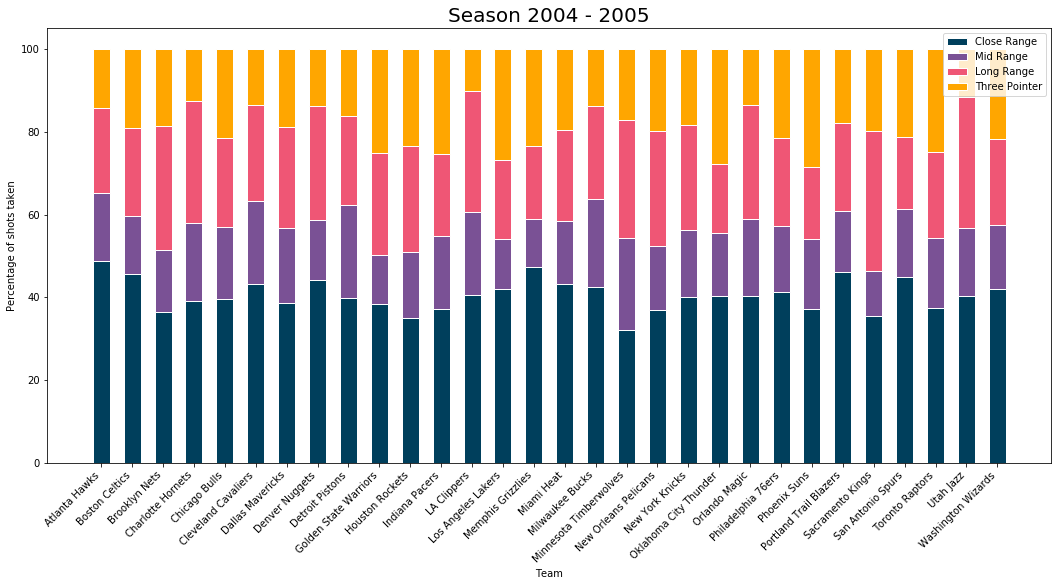

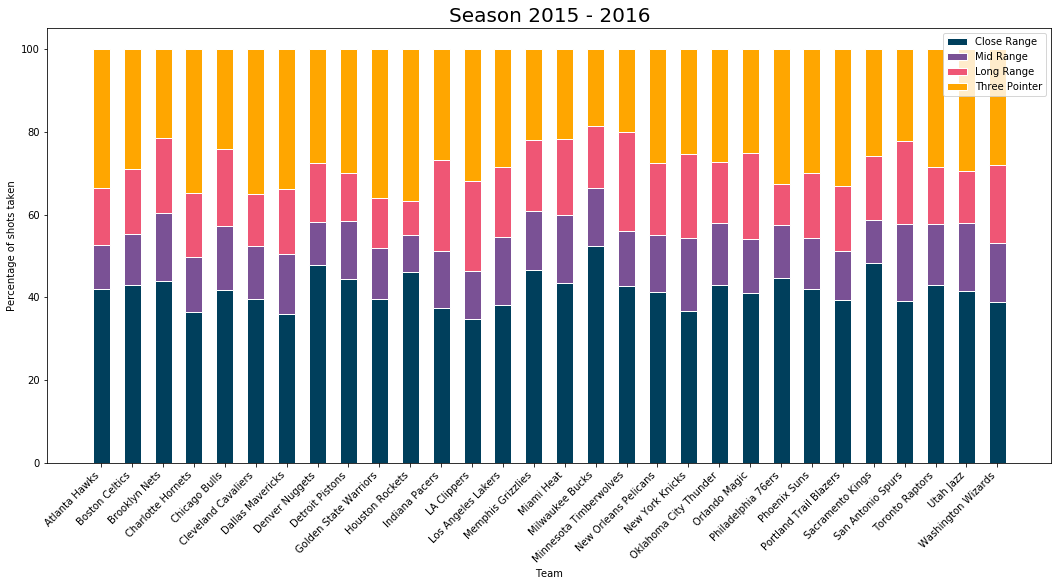

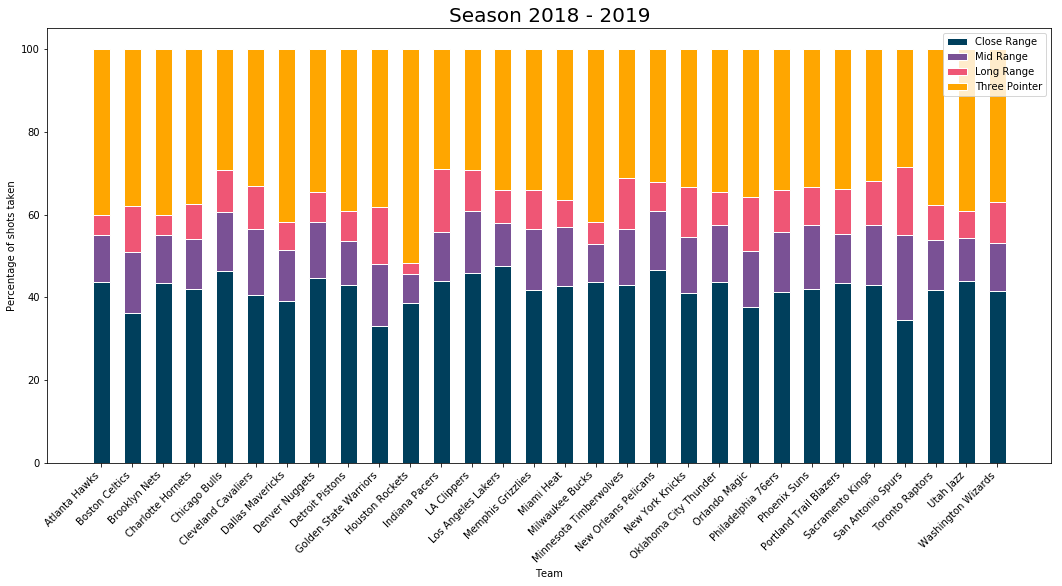

In [98]:
# Setting the index to be the team, and group the dataframe by year
a = final_df.groupby('YEAR').apply(lambda df_: df_.set_index('TEAM', drop=True).sort_index())

# Started in Year 2004, since this is the first year where we have 30 teams.
for year in [2004, 2015, 2018]:

    # Create a figure with a single subplot
    f, ax = plt.subplots(1, figsize=(18,8))

    # Create the total Field Goal Attempted by each team 
    totals = [i+j+k+l for i,j,k,l in zip(a.loc[year]['FGA-C'], a.loc[year]['FGA-M'], a.loc[year]['FGA-L'], a.loc[year]['FGA-T'])]

    # Create the percentage of the close range shot attempts ove total shot attempts
    close = [i / j * 100 for  i,j in zip(a.loc[year]['FGA-C'], totals)]

    # Create the percentage of the mid range shot attempts ove total shot attempts
    mid = [i / j * 100 for  i,j in zip(a.loc[year]['FGA-M'], totals)]

    # Create the percentage of the long range shot attempts ove total shot attempts
    long = [i / j * 100 for  i,j in zip(a.loc[year]['FGA-L'], totals)]

    # Create the percentage of the three point shot attempts ove total shot attempts
    threes = [i / j * 100 for  i,j in zip(a.loc[year]['FGA-T'], totals)]

    team = a.loc[2018].index

    barWidth = 0.55

    # Plot the percentage bar graph
    p1 = plt.bar(team, close, color='#003f5c', edgecolor='white', width=barWidth)

    p2 = plt.bar(team, mid, bottom=close, color='#7a5195', edgecolor='white', width=barWidth)

    p3 = plt.bar(team, long, bottom=[i+j for i,j in zip(close, mid)], color='#ef5675', edgecolor='white', width=barWidth)

    p4 = plt.bar(team, threes, bottom=[i+j+k for i,j,k in zip(close, mid, long)], color='#ffa600', edgecolor='white', width=barWidth)

    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

    # Label and Legend
    plt.title('Season ' + str(year) + ' - ' + str(year+1) , fontsize=20)
    plt.xlabel('Team')
    plt.ylabel('Percentage of shots taken')
    plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Close Range', 'Mid Range', 'Long Range', 'Three Pointer'))

    plt.show()

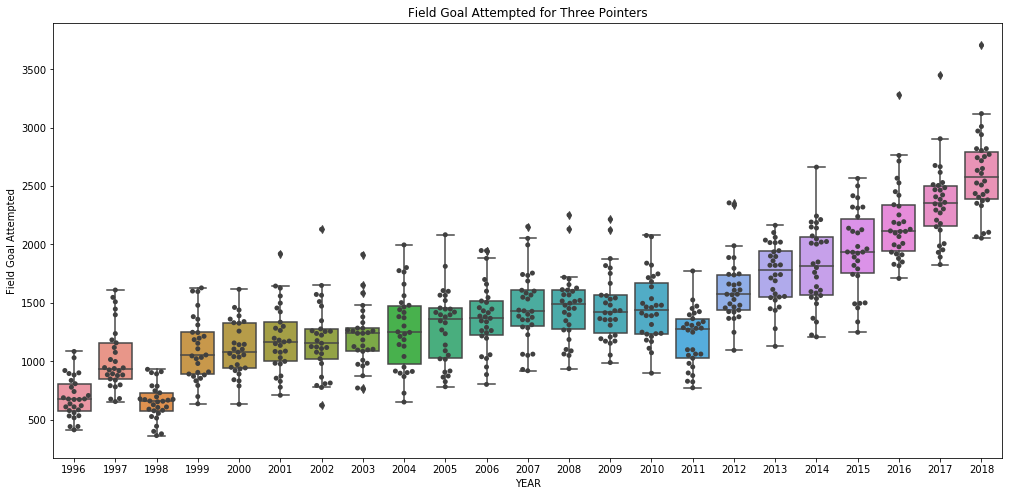

In [99]:
f, ax = plt.subplots(1, figsize=(17,8))
ax = sns.boxplot(x="YEAR", y="FGA-T", data=final_df, )
ax = sns.swarmplot(x="YEAR", y="FGA-T", data=final_df, color=".25")
ax.set_title('Field Goal Attempted for Three Pointers');
ax.set_ylabel('Field Goal Attempted');

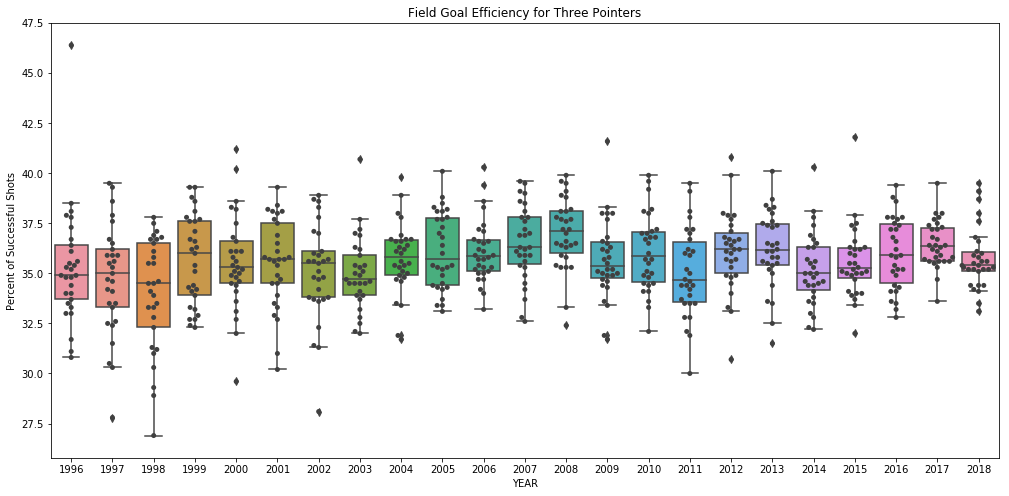

In [100]:
f, ax = plt.subplots(1, figsize=(17,8))
ax = sns.boxplot(x="YEAR", y="FG%-T", data=final_df, )
ax = sns.swarmplot(x="YEAR", y="FG%-T", data=final_df, color=".25")
ax.set_title('Field Goal Efficiency for Three Pointers');
ax.set_ylabel('Percent of Successful Shots');

### Interpreting Data Visualizations
We can see the percentage of three pointer shot increases over the years throughout the years we inspect. The most noticeable jump was from 2015-2016 season to 2016-2017 season. Likewise, the percentage of the mid range, and long range shots being taken by teams have decreased over the years. This is a crucial observation we made in order to get a grasp on if we hypothesized in the right direction. What we learned from our data visualization is that the entire NBA league’s all thirty teams, all the teams are taking more three pointers and less mid range and long range shots.

In [101]:
#possibly include plot of league-wide shot types here? yes

# Data Analysis & Results

### Developing metric / making a new feature

As a starter, we want to verify the trend that teams are attempting more shots that are further away in order to score more. However, the data we have are limited in the sense that shots are grouped in a range type and it is difficult to compare all types of shots in terms of trend. So we come up with a metric that takes in the number of shots for each type and multiply them by their respective distance. We can call this metric `Approximated Average Shot Distance`.

For each group (A. Less than 8 feet: Close Range, B. 8-16 feet: Mid Range, C. 16-24 feet: Long Range, D. 24+ feet: Three Pointer), we approximated a best guess of the average shot distance for each group. They are:
 - 5 feet for Close Range
 - 12 feet for Mid Range
 - 20 feet for Long Range
 - 25 feet for Three Pointer

In [102]:
# Function definition:
# Takes in a series of data from one year for a team
# Returns the approximated average shot distance

def average_shooting_dist(s):
    sum_all_distances = 5 * s['FGA-C'] + 12 * s['FGA-M'] + 20 * s['FGA-L'] + 25 * s['FGA-T']
    num_of_attempts = s['FGA-C'] + s['FGA-M'] + s['FGA-L'] + s['FGA-T']
    return sum_all_distances / num_of_attempts

# Calculate and add to dataframe
final_df['avg_shot_dist'] = final_df.apply(average_shooting_dist, axis=1)

`Approximated Average Shot Distance`

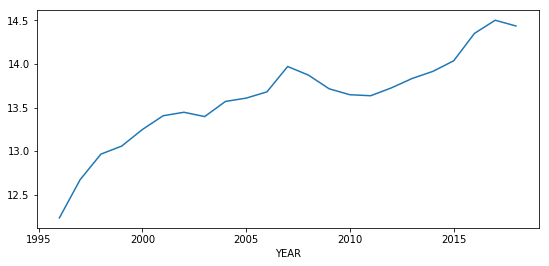

In [103]:
final_df.groupby('YEAR')['avg_shot_dist'].mean().plot(figsize=(9, 4), );

### Shot/Win Differential - Finding a relationship between three-pointers and more wins

After looking at the change over time for different types of shots taken and the trend towards longer distance shots, we decided to try to use the data to determine if there was a relationship between a team taking more three-pointers and winning more games during the regular season. In doing this, however, we were faced with the unique challenge of the relativity of win rate - that is, any given team's win rate is related to the win rate of all other teams. 

Suppose that there was a perfect 1:1 relationship between three-point shots and win rate, and that every team increased their three-point shots by the exact same amount in a given season. Then theoretically every team should still have the same win rate, as the **relative** amount of three-pointers for every team remains the same. This would make quantifying the effect of three-pointers on win rate impossible.

Luckily, NBA teams all change their shooting strategy from year-to-year in vastly different ways and at vastly different times. Because of this, we decided that we would be able to most accurately calculate the relationship between three-pointers and win rate by computing each team's **change** in three-pointers and win rate for each year. This way, we would be able to tell if teams jumping onto the three-pointer bandwagon saw a corresponding increase in wins.
<br>

First we decided to directly take a look at the change in three-point shot percentage from year to year and the change in win percentage from year to year for each team. After adding these to the dataframe, we then plotted and compared them side-by-side for a few random teams.

In [104]:
#choose 3 random teams to plot just to get a feel for what's going on
team_dfs = []
for i in range(0,3):
    teams_list = final_df['TEAM'].unique().tolist()
    index = random.randint(0, len(teams_list) - 1)
    team_name = teams_list[index]
    team_dfs.append(final_df[final_df['TEAM'] == team_name])
#team_dfs a list of 3 random team dataframes we will plot

#reset the indices to start at 0, have step size 1 since they're jumbled up now
for i, team in enumerate(team_dfs):
    team_dfs[i] = team.set_index(np.arange(team.shape[0]))

Note that the change in shot type and the change in win rate for each year was calculated relative to the previous year, i.e. according to the following rule:
<br>
<br>
$ \text{Create a list of percent change } \Delta S = \{\Delta S_{0}, \Delta S_{1}, ..., \Delta S_{i}, ..., \Delta S_{n}\} \text{ by year for all n years.}\\
\Delta S_{i} = \frac{S_{i} - S_{i-1}}{S_{i-1}} \\ \Delta S \text{ will span years 1997-2018.}$

In [105]:
#for all 3 random teams, calculate the change in three-pointers and add a new column 'dFGA-T' to represent the change
for i, team in enumerate(team_dfs):
    delS_A = []
    #perform the operation for each row (year)
    for index, row in team.iterrows():
        #don't do anything if it's the first year because we can't access index = -1
        if index-1 == -1:
            pass
        else:
            del_Si = (team.loc[index]['FGA-T'] - team.loc[index-1]['FGA-T'])/(team.loc[index-1]['FGA-T'])
            delS_A.append(del_Si)
    #insert dummy 0 at start of list to represent the fact that year 1996 is our baseline
    delS_A.insert(0,0)
    team_dfs[i]['dFGA-T'] = delS_A

In [106]:
#same as before but now calculate win differential, add to df
for i, team in enumerate(team_dfs):
    delS_W = []
    for index, row in team.iterrows():
        if index-1 == -1:
            pass
        else:
            del_Si = (team.loc[index]['W/L%'] - team.loc[index-1]['W/L%'])/(team.loc[index-1]['W/L%'])
            delS_W.append(del_Si)
    #insert dummy 0 at start of list to represent the fact that year 1996 is our baseline
    delS_W.insert(0,0)
    team_dfs[i]['dWin%'] = delS_W

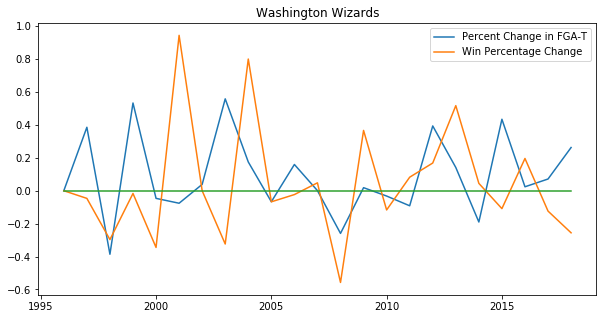

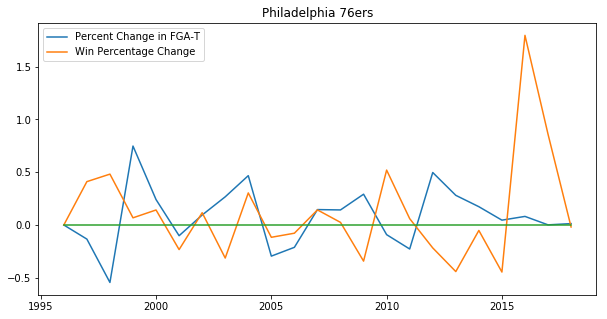

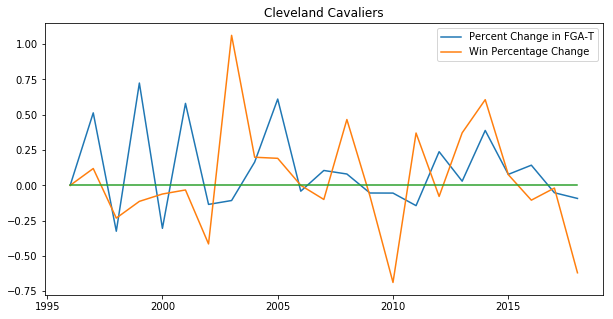

In [107]:
#now plot all three random teams' three pointer change vs win rate change
for team in team_dfs:
    plt.figure(figsize=(10,5))
    plt.plot(team['YEAR'], team['dFGA-T'], label='Percent Change in FGA-T')
    plt.plot(team['YEAR'], team['dWin%'], label = 'Win Percentage Change')
    plt.plot(team['YEAR'], [0]*team['YEAR'].shape[0])
    plt.title(team.loc[0]['TEAM'])
    plt.legend()
    plt.show()

For these graphs, if a positive change in three-pointers corresponds to a positive change in win percentage, then we should see the two lines move up and down in synchrony. Note that the green line represents a baselines 0% change, so if the lines dip below the green line that represents a decrease relative to the previous year, and an increase if above.

Clearly there seems to be a large degree of variance across teams, which makes sense since there are countless other factors besides three-pointers that determine a team's win rate. However, we can sort of see a relationship for some teams by inspection alone.

To quantify these relationships, we decided to take time out of the picture and just look at every team's change in three-point shots and corresponding change in win rate for every year, and run a patsy OLS Regression on these two variables to determine if they have a statistically significant relationship. First we made a scatterplot of three-point shot change vs corresonding win rate change:

In [109]:
#now team_dfs will contain all teams
team_dfs = []
teams_list = final_df['TEAM'].unique().tolist()

#so we split up the big original dataframe by team and put it into a list of teams
for i in teams_list:
    team_dfs.append(final_df[final_df['TEAM'] == i])

for i, team in enumerate(team_dfs):
    team_dfs[i] = team.set_index(np.arange(team.shape[0]))

In [110]:
#now we should calculate delS_A and delS_W for every team and add each as a column
for i, team in enumerate(team_dfs):
    #now calculate change in three pointers each year
    delS_A = []
    for index, row in team.iterrows():
        if index-1 == -1:
            pass
        else:
            del_Si = (team.loc[index]['FGA-T'] - team.loc[index-1]['FGA-T'])/(team.loc[index-1]['FGA-T'])
            delS_A.append(del_Si)
    #insert dummy 0 at start of list to represent the fact that year 1996 is our baseline
    delS_A.insert(0,0)
    team_dfs[i]['dFGAT'] = delS_A

for i, team in enumerate(team_dfs):
    #now calculate change in win rate each year
    delS_W = []
    for index, row in team.iterrows():
        if index-1 == -1:
            pass
        else:
            del_Si = (team.loc[index]['W/L%'] - team.loc[index-1]['W/L%'])/(team.loc[index-1]['W/L%'])
            delS_W.append(del_Si)
    #insert dummy 0 at start of list to represent the fact that year 1996 is our baseline
    delS_W.insert(0,0)
    team_dfs[i]['dWinPer'] = delS_W

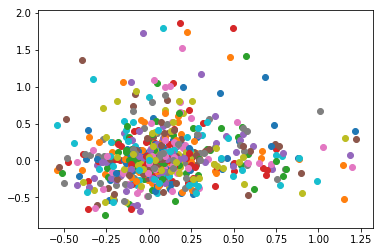

In [111]:
for team in team_dfs:
    plt.scatter(team['dFGAT'], team['dWinPer'])

As we expected there is a great deal of variance in the data. Now we run the OLS Regression:

In [112]:
#fit linreg
linreg_df = pd.concat(team_dfs)
outcome_1, predictors_1 = patsy.dmatrices('dWinPer ~ dFGAT', linreg_df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                dWinPer   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     8.847
Date:                Sat, 08 Jun 2019   Prob (F-statistic):            0.00304
Time:                        14:23:57   Log-Likelihood:                -251.58
No. Observations:                 682   AIC:                             507.2
Df Residuals:                     680   BIC:                             516.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0396      0.014      2.803      0.0

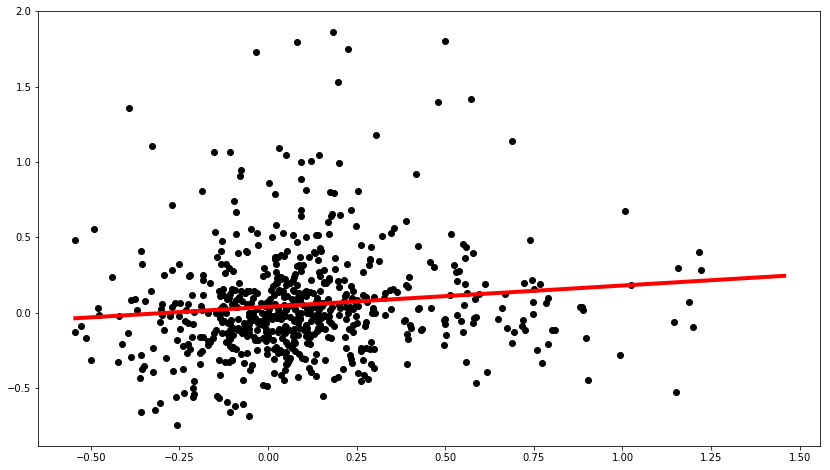

In [113]:
plt.figure(figsize=(14,8))
plt.scatter(linreg_df['dFGAT'],linreg_df['dWinPer'], c='k')
xs = np.arange(linreg_df['dFGAT'].min(), linreg_df['dWinPer'].max())
ys = 0.1407 * xs + 0.0396
plt.plot(xs, ys, 'r', linewidth=4, label='Model')
plt.show()

In [114]:
# I wanted to discuss this part before writing up any sort of interpretation or results section - CHase

We have noticed a trend in an increase in the amount of three point shots taken over the years. We have also determined that there is a positive correlation between an increase in three point shots taken and the winning percentage. However, despite this correlation, statistically, we have to conclude that an increase in three point shots taken does not greatly impact the winning percentage of a team, since [place reason here]. We believe although there is a correlation, there are simply too many variables in a basketball game, like the height of players, the opponent’s defense, and minutes each players play. There are too many variables that affect the win rate, and not a single one can impact winning percentage is a significant way.

# Privacy/Ethics Considerations

### Question and Data

NBA games broadcast far and wide so fans all around the world may enjoy them. Consequently, we conclude that privacy will not be a major issue. The NBA supplies a comprehensive dataset that displays team names and does not contain any other sensitive data that may jeopardize an individual’s anonymity such as an individual player’s name and their personal statistics. The dataset displays numerical statistics associated with those teams over several years and thus remains unbiased. To add a layer of anonymity, we could censor team names and replace them with markers for statistics purposes but our research question discourages this. We want to find a correlation between shot type and win rate in order to apply it to real basketball teams. However, our data may be used for gambling purposes if we find an overall win streak between teams. We can not avoid this possibility due to the nature of statistical analysis in sports. Our dataset comes from the NBA and we comply with their Terms of Use policy located here: (http://www.nba.com/news/termsofuse) under Section 9. NBA STATISTICS. The NBA publishes their datasets publicly which contain all the relevant data we need to answer our research question.

### Analysis

Since the data science question being asked is in the topic of NBA, which is a competitive multi-billion dollar industry, there should be consideration for the impact of our analysis means for the NBA community. We concluded that 3 pointers should be a factor in winning more games, and as a result, players could be forced into thinking practicing more long-range shots and value team-based tactics less. The issue here is addressed because we also conclude that there is much variance in the model and more 3 pointers cannot be THE tactic that gurantees winning more games. This analysis should not be taken as a significant discovery for 3 points shots' effectiveness.

# Conclusion & Discussion

### Summary and Conclusion
Professional basketball, a game of skill and numbers, provides a foundation to build a plethora of statistical analysis. The National Basketball Association (NBA) collects data from all its teams over several years which allows basketball fans to see the growth of their favorite teams. From their dataset, we pull each team’s shot statistics and number of wins over several years in order to find a correlation between number of three-point shots attempted and win rate. 

We have noticed a trend in an increase in the amount of three point shots taken over the years. 
We have also determined that there is a positive correlation between an increase in three point shots taken and the winning percentage. Despite this correlation, statistically, we have to conclude that an increase in three point shots taken does not greatly impact the winning percentage of a team, since the R-squared (the proportion of win percent variation that can be explained by the linear change in three points shots taken) is as low as 0.013. We believe although there is a correlation, there are simply too many variables in a basketball game, like the height of players, the opponent’s defense, and minutes each players play. There are too many variables that affect the win rate, and not a single one can impact winning percentage is a significant way.


### Limitations
Our study only investigates the correlational relationships between win rates and other variables. We can't establish causality--our project was observational from the beginning. Also, correlational studies only investigates the linear relationships, but there should be more complex models that generalizes the relationship more. The downside of that is we cannot determine if the statistical significance of each variable. As for the data, we are limited to data from professional basketball teams because reports and statisticians do not provide a comprehensive dataset for minor leagues.

Our project has little impact on society as a whole. Our analysis is not groundbreaking but it provides additional information about a national pastime that many fans enjoy. We hope we might influence teams in the future to attempt more high risk, high reward plays which would make proceeding games much more exciting than before. We predict this trend of more three-point shots attempted to eventually peter out as more efficient tactics are developed.